In [258]:
import numpy as np
import snap
import matplotlib.pyplot as plt
from scipy.special import gammainc

In [162]:
FIn = snap.TFIn("../../graphs/investors_to_companies_directed/investors_to_companies_directed_folded.graph")
companies_folded = snap.TUNGraph.Load(FIn)
print companies_folded.GetNodes()
print companies_folded.GetEdges()

11572
768063


In [163]:
FIn = snap.TFIn("../../graphs/investors_to_companies_directed/investors_to_companies_directed_folded_reverse_order.graph")
investors_folded = snap.TUNGraph.Load(FIn)
print investors_folded.GetNodes()
print investors_folded.GetEdges()

10465
33053


In [334]:
FIn = snap.TFIn("../../graphs/deconv_notebook_graphs/common_region_or_industry_or_investor.graph")
augmented_companies = snap.TUNGraph.Load(FIn)
print augmented_companies.GetNodes()
print augmented_companies.GetEdges()

15114
13504003


In [337]:
def plot_deg_dist(G, title):
    fig = plt.figure(figsize=(12.5, 7.5))
    
    DegToCntV = snap.TIntPrV()
    snap.GetDegCnt(G, DegToCntV)
    
    X, Y = [], []
    for item in DegToCntV:
        val1 = item.GetVal1()
        val2 = item.GetVal2()

        if val1 != 0 and val2 != 0:
            X.append(val1)
            Y.append(val2)

    # Turn Y into a probability distribution
    Y /= np.sum(Y, dtype="float32")

    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(X, Y, color="blue", alpha=0.5, s=9)
    plt.xlabel("Degree (k)")
    plt.ylabel("P(X=k)")
    plt.title(title)
    plt.show()
    
    fig.savefig("/Users/samschwager 1/Desktop/" + title + ".png", dpi=fig.dpi)
    
    return X, Y

In [331]:
def plot_CCDF(X, Y, title, cutoff=-1):
    fig = plt.figure(figsize=(12.5, 7.5))
    
    CCDF_X, CCDF_Y = None, None
    
    if cutoff > 0: 
        keep_top = len([x for x in X if x < cutoff])
        CCDF_Y = np.cumsum(Y)[::-1][:keep_top]
        CCDF_X = X[:keep_top]
        
        print str(keep_top) + " of the " + str(len(X)) + " points have degree less than " + str(cutoff)
        
        
    else:
        CCDF_Y = np.cumsum(Y)[::-1]
        CCDF_X = X
        
    plt.scatter(CCDF_X, CCDF_Y, color="blue", alpha=0.5, s=9)
    plt.xlabel("Degree (k)")
    plt.ylabel("P(X>k)")
    plt.title(title)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    
    fig.savefig("/Users/samschwager 1/Desktop/" + title + ".png", dpi=fig.dpi)

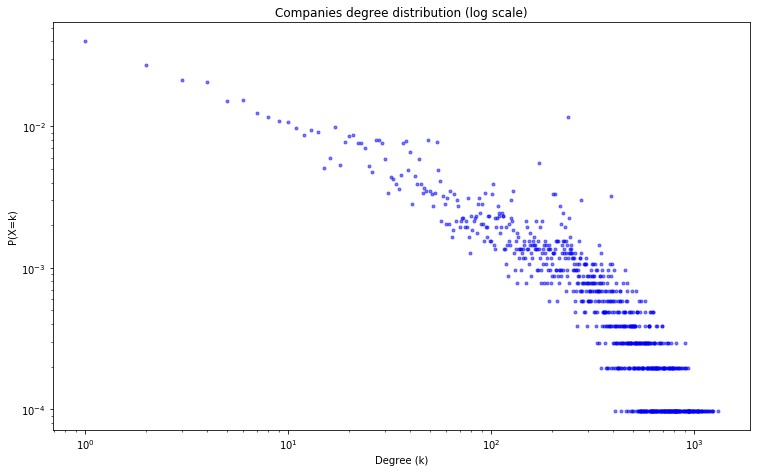

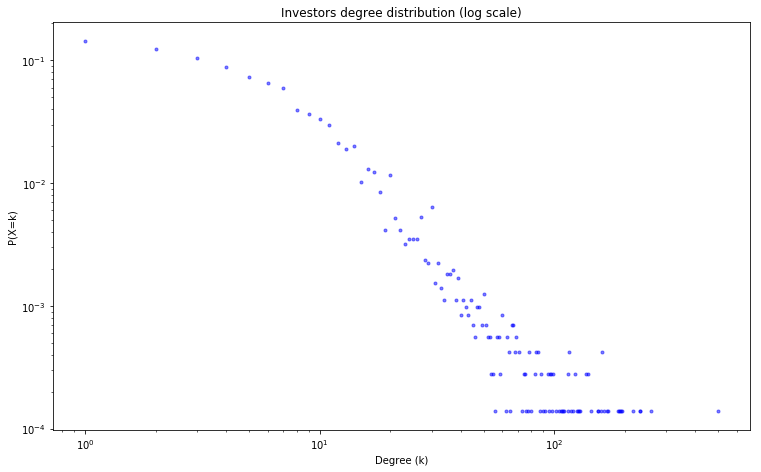

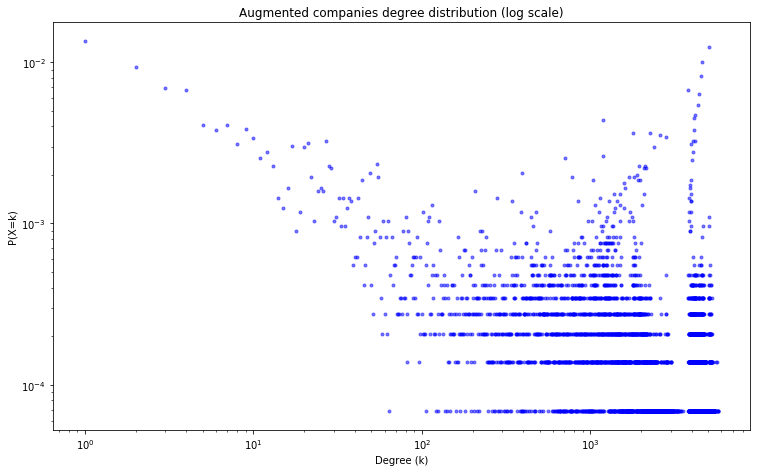

In [338]:
X_companies, Y_companies = plot_deg_dist(companies_folded, "Companies degree distribution (log scale)")
X_investors, Y_investors = plot_deg_dist(investors_folded, "Investors degree distribution (log scale)")
X_companies_augmented, Y_companies_augmented = plot_deg_dist(augmented_companies, "Augmented companies degree distribution (log scale)")

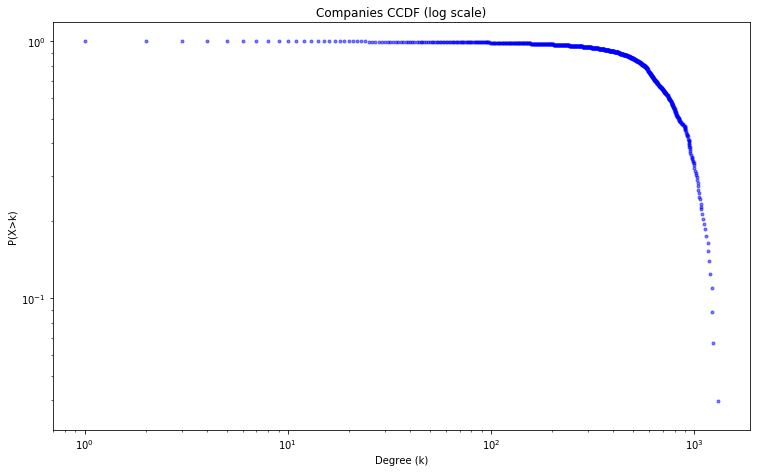

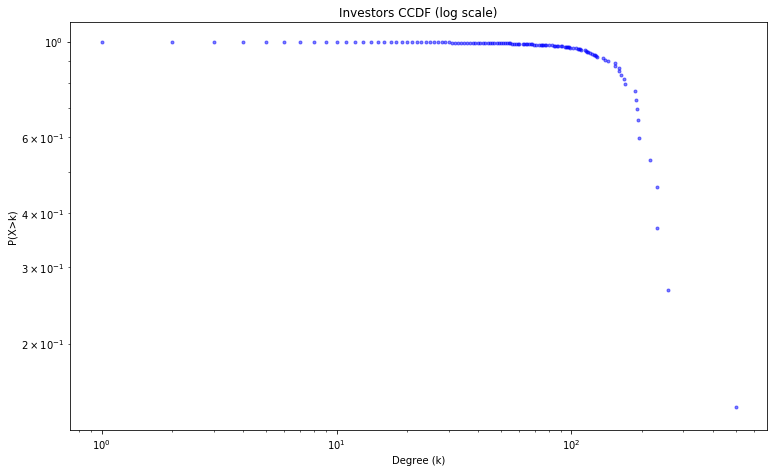

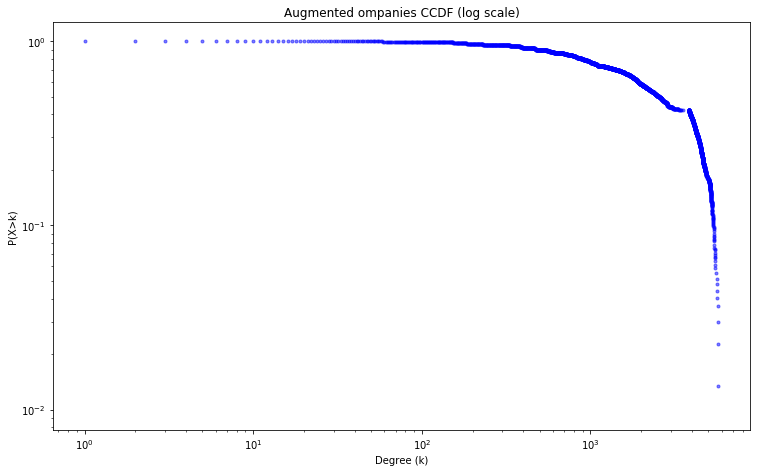

In [339]:
plot_CCDF(X_companies, Y_companies, "Companies CCDF (log scale)")
plot_CCDF(X_investors, Y_investors, "Investors CCDF (log scale)")
plot_CCDF(X_companies_augmented, Y_companies_augmented, "Augmented ompanies CCDF (log scale)")

14 of the 818 points have degree less than 15


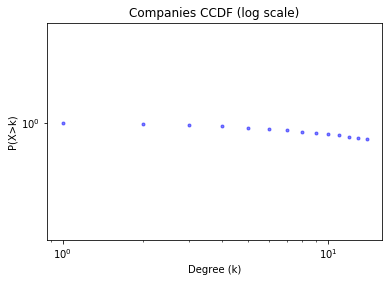

9 of the 125 points have degree less than 10


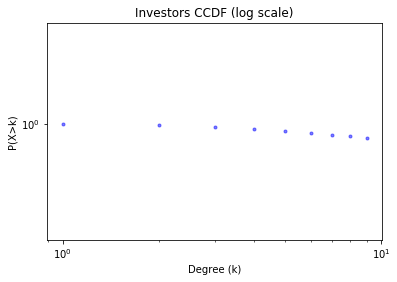

In [121]:
plot_CCDF(X_companies, Y_companies, "Companies CCDF (log scale)", 15)
plot_CCDF(X_investors, Y_investors,"Investors CCDF (log scale)", 10)

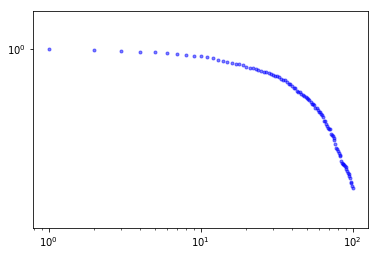

In [176]:
# Zoom in on the first 100 points
plt.scatter(X[:100], CCDF_Y[:100], color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')

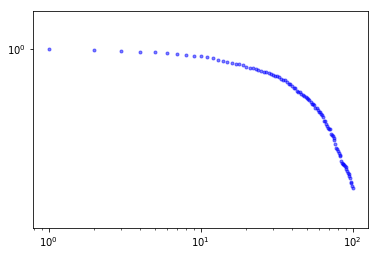

In [177]:
# Zoom in on the first 50 points
plt.scatter(X[:100], CCDF_Y[:100], color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')

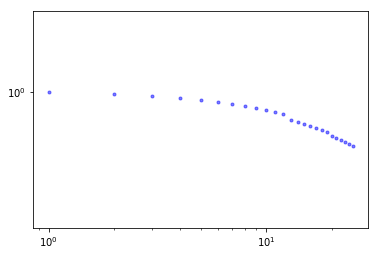

In [178]:
# Zoom in on the first 25 points
plt.scatter(X[:25], CCDF_Y[:25], color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')

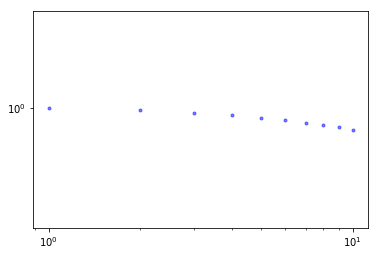

In [179]:
# Zoom in on the first 10 points
plt.scatter(X[:10], CCDF_Y[:10], color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')

From the above we conclude that x_m = 10 is the cutoff for the linear regime, so we only want to consider the 

[ 0.00011857 -0.00062774 -0.00137405 -0.00212035 -0.00286666 -0.00361297
 -0.00435927 -0.00510558 -0.00585189 -0.00659819 -0.0073445  -0.00809081
 -0.00883711 -0.00958342 -0.01032973 -0.01107603 -0.01182234 -0.01256865
 -0.01331495 -0.01406126]


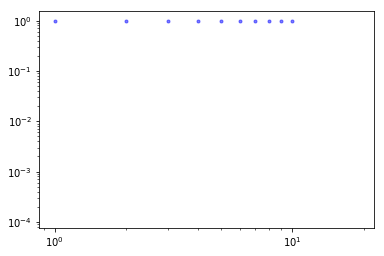

In [175]:
# x_m is the end of the linear regime of the CCDF
x_m = 10
plt.scatter(X[:x_m], CCDF_Y[:x_m], color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')
best_fit = np.polyfit(np.log10(X[:x_m]), np.log10(CCDF_Y[:x_m]), 1)

best_fit_X = np.arange(0, 20)
best_fit_Y = best_fit[1] + best_fit[0] * best_fit_X
plt.plot(best_fit_X, best_fit_Y, color="red")
print best_fit_Y
plt.show()

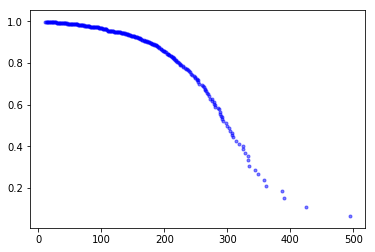

In [167]:
# Exponential regime from x_m to end
plt.scatter(X[x_m:], CCDF_Y[x_m:], color="blue", alpha=0.5, s=9)
plt.show()

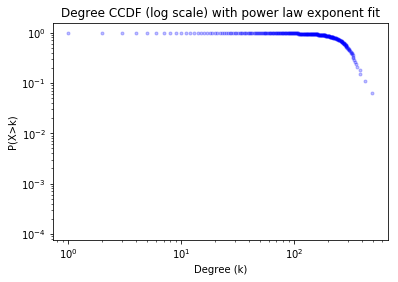

In [168]:
# Show line of best fit on full CCDF plot
best_fit_X = np.arange(0, 500)
best_fit_Y = best_fit[1] + best_fit[0] * best_fit_X
plt.scatter(X, CCDF_Y, color="blue", alpha=0.25, s=9)
plt.xlabel("Degree (k)")
plt.ylabel("P(X>k)")
plt.title("Degree CCDF (log scale) with power law exponent fit")
plt.xscale('log')
plt.yscale('log')
plt.plot(best_fit_X, best_fit_Y, color="red")
plt.show()

############################################################################################################################
NOW WE ARE READY TO SERIOUSLY ATTEMPT CALCULATING THE POWER LAW EXPONENT:


In [220]:
# Calculates the power law exponent using Maximum Likelihood
# Estimation as described in slide 25 of Lecture #14
def MLE(X, x_m):
    n = len(X)
    return 1 + n * np.power(np.sum(np.log(X)) - n * np.log(x_m), -1)

5.47073126497


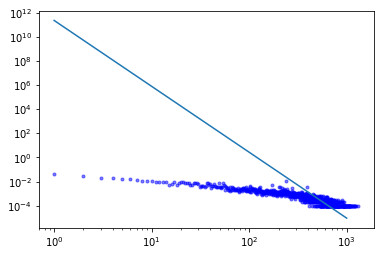

In [342]:
# plot the exponents determined from MLE against companies PDF
x_m = 250.
alpha_companies = MLE(X_companies, x_m)
print alpha_companies
X_exponent = np.arange(1, 1000)
Y_exponent = ((alpha_companies - 1.) / x_m) * np.power(X_exponent / x_m, -1.0 * alpha_companies)
plt.plot(X_exponent, Y_exponent)

DegToCntV = snap.TIntPrV()
snap.GetDegCnt(companies_folded, DegToCntV)

X, Y = [], []
for item in DegToCntV:
    val1 = item.GetVal1()
    val2 = item.GetVal2()

    if val1 != 0 and val2 != 0:
        X.append(val1)
        Y.append(val2)

# Turn Y into a probability distribution
Y /= np.sum(Y, dtype="float32")

# plot PDF
plt.scatter(X, Y, color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')
plt.show()

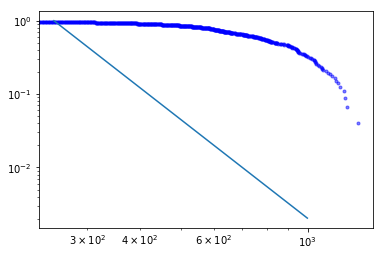

In [343]:
# plot the exponents determined from MLE against companies CCDF
# Form of CCDF found here: http://www.leonidzhukov.net/hse/2016/networks/lectures/lecture2.pdf
# On slide 9/31
X_exponent = np.arange(x_m, 1000)
Y_exponent = np.power(X_exponent / x_m, 1 - alpha_companies)
plt.plot(X_exponent, Y_exponent)

CCDF_Y = np.cumsum(Y)[::-1]
CCDF_X = X

plt.scatter(CCDF_X, CCDF_Y, color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')

2.02853297377


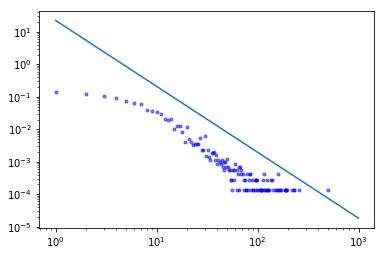

In [344]:
# plot the exponents determined from MLE against investors PDF
x_m = 20.
alpha_investors = MLE(X_investors, x_m)
print alpha_investors
X_exponent = np.arange(1, 1000)
Y_exponent = ((alpha_investors - 1.) / x_m) * np.power(X_exponent / x_m, -1.0 * alpha_investors)
plt.plot(X_exponent, Y_exponent)


DegToCntV = snap.TIntPrV()
snap.GetDegCnt(investors_folded, DegToCntV)

X, Y = [], []
for item in DegToCntV:
    val1 = item.GetVal1()
    val2 = item.GetVal2()

    if val1 != 0 and val2 != 0:
        X.append(val1)
        Y.append(val2)

# Turn Y into a probability distribution
Y /= np.sum(Y, dtype="float32")

plt.xscale('log')
plt.yscale('log')
plt.scatter(X, Y, color="blue", alpha=0.5, s=9)


plt.show()

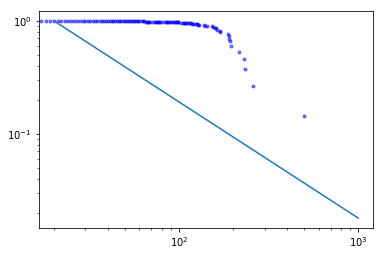

In [345]:
# plot the exponents determined from MLE against investors CCDF
# Form of CCDF found here: http://www.leonidzhukov.net/hse/2016/networks/lectures/lecture2.pdf
# On slide 9/31
X_exponent = np.arange(x_m, 1000)
Y_exponent = np.power(X_exponent / x_m, 1 - alpha_investors)
plt.plot(X_exponent, Y_exponent)

CCDF_Y = np.cumsum(Y)[::-1]
CCDF_X = X

plt.scatter(CCDF_X, CCDF_Y, color="blue", alpha=0.5, s=9)
plt.xlabel("P(X > k)")
plt.xlabel("Degree (k)")
plt.xscale('log')
plt.yscale('log')

We will now attempt to fit a power law with exponential cutoff

In [287]:
def log_lik(alpha, lambda_val):
    return(1 - alpha) * np.log(lambda_val) - np.log(gammainc(1 - alpha, x_m * lambda_val))\
                                - alpha * np.sum(np.log(X) - lambda_val * np.sum(X))

In [301]:
def MLE_exp_cutoff(X, x_m):
    alpha = 0.5
    lambda_val = 0.5
    epsilon = 0.00001
    
    for i in range(10000):
        alpha_deriv = log_lik(alpha, lambda_val) - log_lik(alpha + epsilon, lambda_val)
        lambda_deriv = log_lik(alpha, lambda_val) - log_lik(alpha, lambda_val + epsilon)
        
        alpha += epsilon * alpha_deriv
        lambda_val += epsilon * lambda_deriv
        
    print alpha, lambda_val

In [302]:
MLE_exp_cutoff(X_investors, 2.)

0.145025550508 0.144041433759
